In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [27]:
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime 

In [29]:
# List of Indian stock symbols
stocks = ['RELIANCE.NS', 'ADANIENT.NS', 'SUNPHARMA.NS', 'HINDUNILVR.NS']

#setting up start date and end date for picking up data 
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download data for these stocks from yfinance
data = yf.download(stocks, start, end)

# Display the first few rows of data
print(data.head())

[*********************100%***********************]  4 of 4 completed

Price                        Adj Close                             \
Ticker                     ADANIENT.NS HINDUNILVR.NS  RELIANCE.NS   
Date                                                                
2023-09-08 00:00:00+00:00  2518.284424   2471.419434  2439.918945   
2023-09-11 00:00:00+00:00  2613.895752   2493.490723  2466.229736   
2023-09-12 00:00:00+00:00  2534.677734   2456.721680  2430.600586   
2023-09-13 00:00:00+00:00  2517.884521   2464.291504  2442.759277   
2023-09-14 00:00:00+00:00  2518.784424   2458.638672  2445.001709   

Price                                         Close                \
Ticker                    SUNPHARMA.NS  ADANIENT.NS HINDUNILVR.NS   
Date                                                                
2023-09-08 00:00:00+00:00  1120.489136  2519.300049   2513.800049   
2023-09-11 00:00:00+00:00  1126.882446  2614.949951   2536.250000   
2023-09-12 00:00:00+00:00  1135.158813  2535.699951   2498.850098   
2023-09-13 00:00:00+00:00  1138.6

In [35]:
# Apply describe() to each stock
for stock in stocks:
    print(f"Descriptive statistics for {stock}:")
    print(data['Adj Close'][stock].describe())  # Access the 'Adj Close' price for each stock
    print("\n")

Descriptive statistics for RELIANCE.NS:
count     243.000000
mean     2749.907476
std       271.946043
min      2218.968750
25%      2450.283813
50%      2873.198242
75%      2948.492920
max      3190.969971
Name: RELIANCE.NS, dtype: float64


Descriptive statistics for ADANIENT.NS:
count     243.000000
mean     2924.976093
std       338.344328
min      2148.983398
25%      2802.919678
50%      3053.468506
75%      3170.800049
max      3643.780518
Name: ADANIENT.NS, dtype: float64


Descriptive statistics for SUNPHARMA.NS:
count     243.000000
mean     1428.861070
std       209.515680
min      1079.007935
25%      1222.432983
50%      1499.245728
75%      1568.762451
max      1832.849976
Name: SUNPHARMA.NS, dtype: float64


Descriptive statistics for HINDUNILVR.NS:
count     243.000000
mean     2473.194015
std       158.147272
min      2172.880371
25%      2368.846191
50%      2464.291504
75%      2545.655884
max      2841.250000
Name: HINDUNILVR.NS, dtype: float64




In [ ]:
CLOSING PRICE

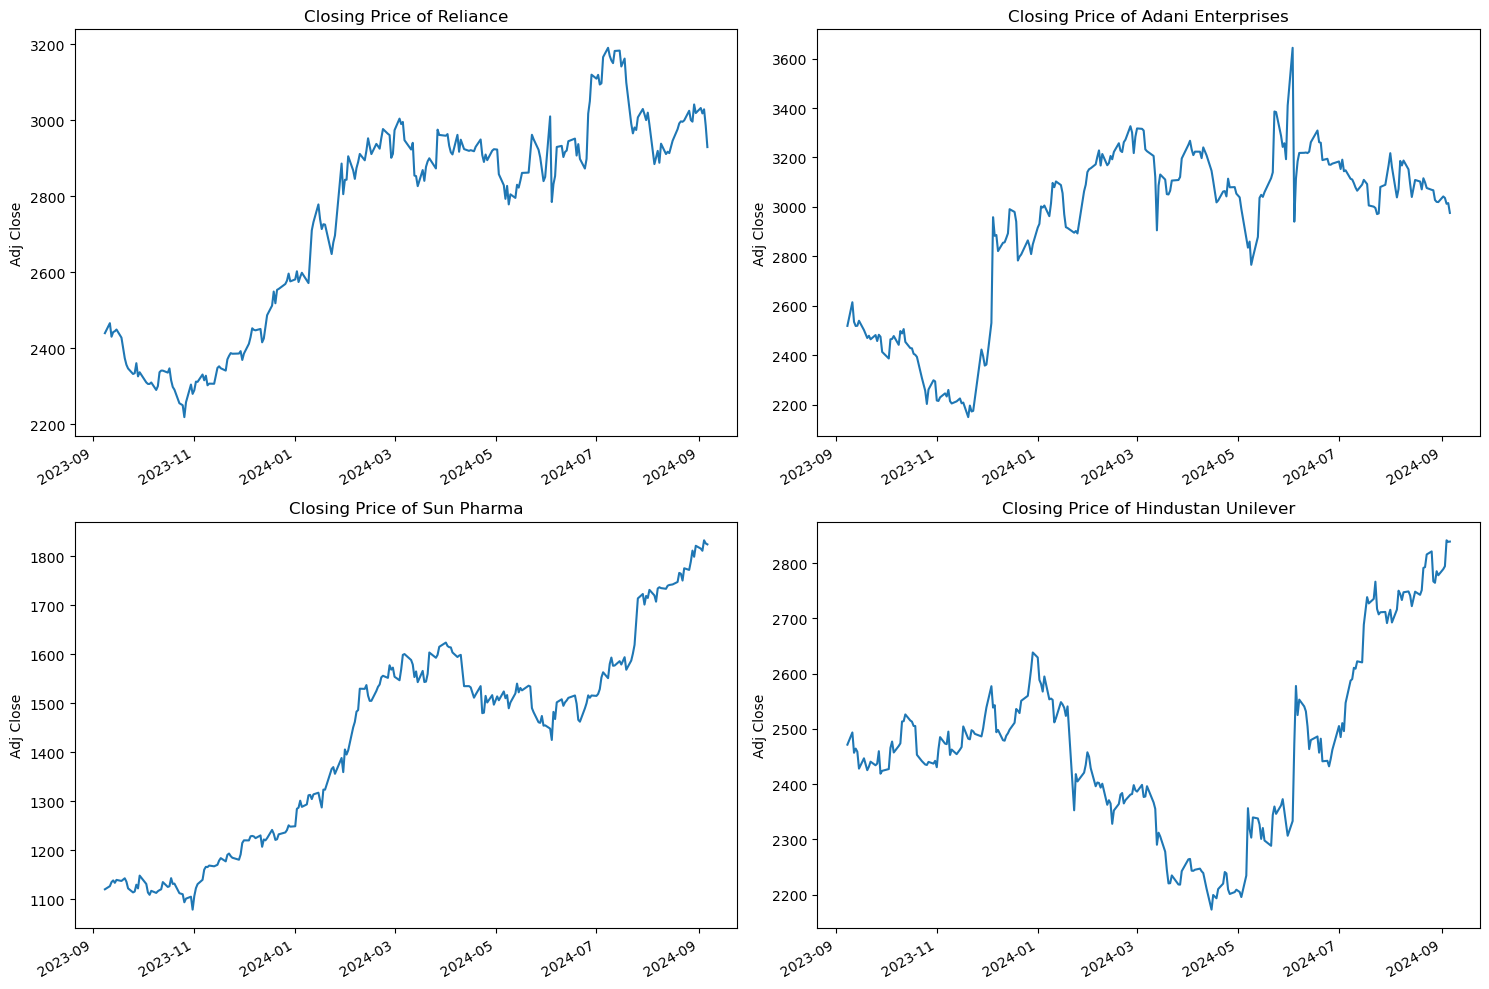

In [41]:
# List of Indian stock symbols and corresponding company names
company_list = ['RELIANCE.NS', 'ADANIENT.NS', 'SUNPHARMA.NS', 'HINDUNILVR.NS']
company_names = ['Reliance', 'Adani Enterprises', 'Sun Pharma', 'Hindustan Unilever']

# Create a figure
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Loop through the company list and plot the data
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)  # 2x2 grid of plots
    data['Adj Close'][company].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_names[i - 1]}")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

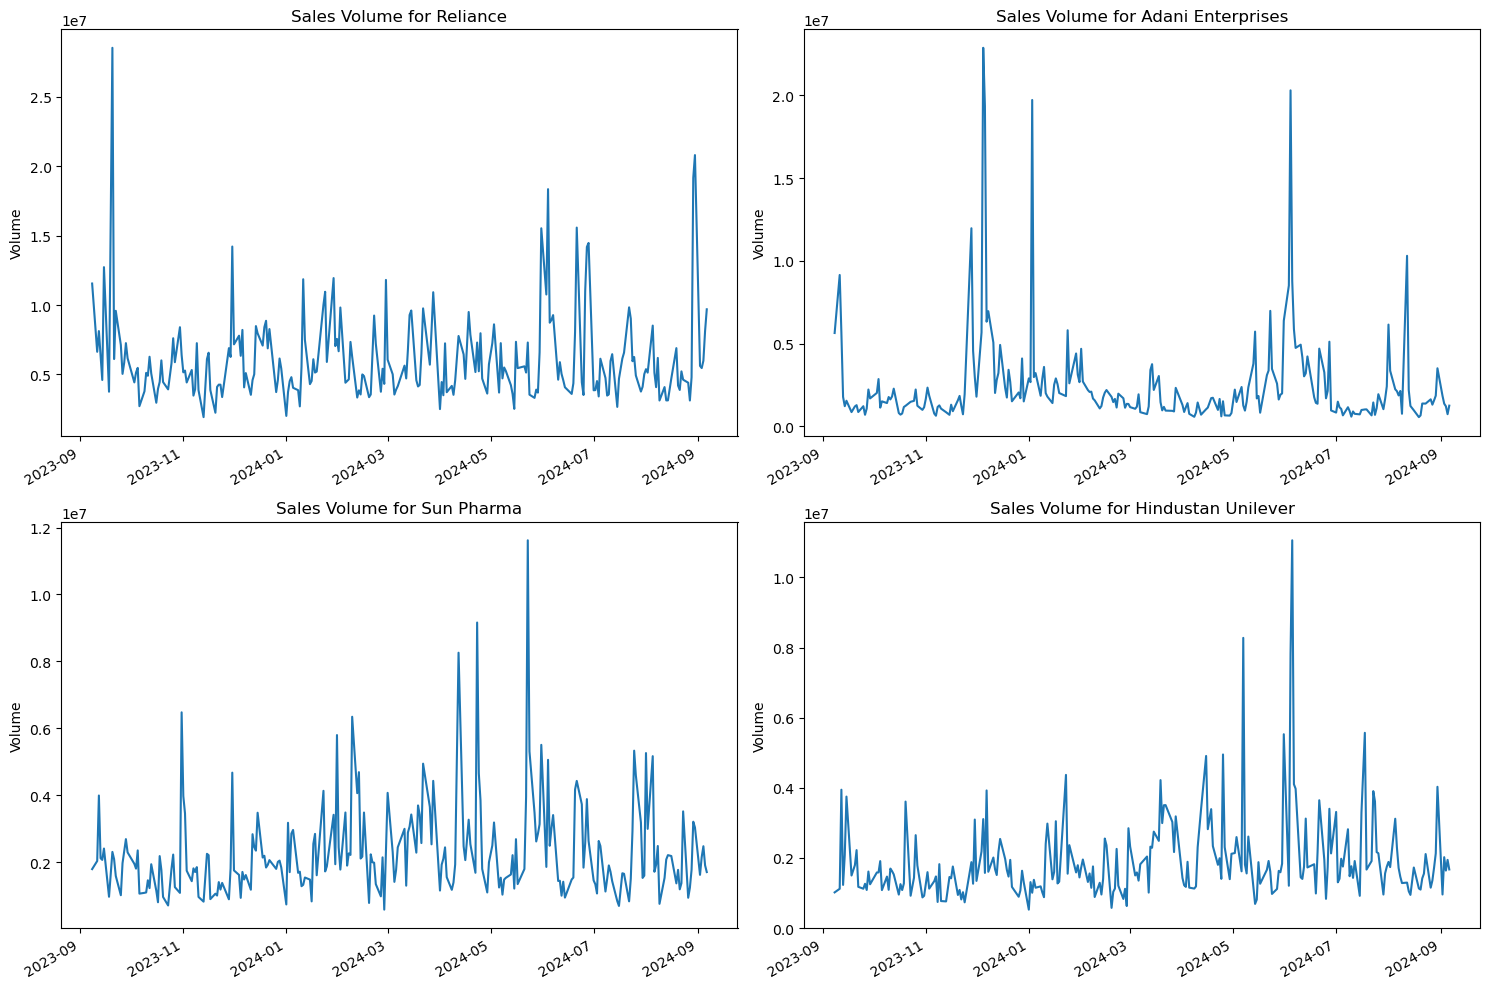

In [45]:
# Create a figure for the plot
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Loop through the company list and plot the volume data
for i, ticker in enumerate(company_list, 1):
    plt.subplot(2, 2, i)  # 2x2 grid of plots
    data['Volume'][ticker].plot()  # Plot the volume data for each ticker
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_names[i - 1]}")  # Use the company name for the title

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

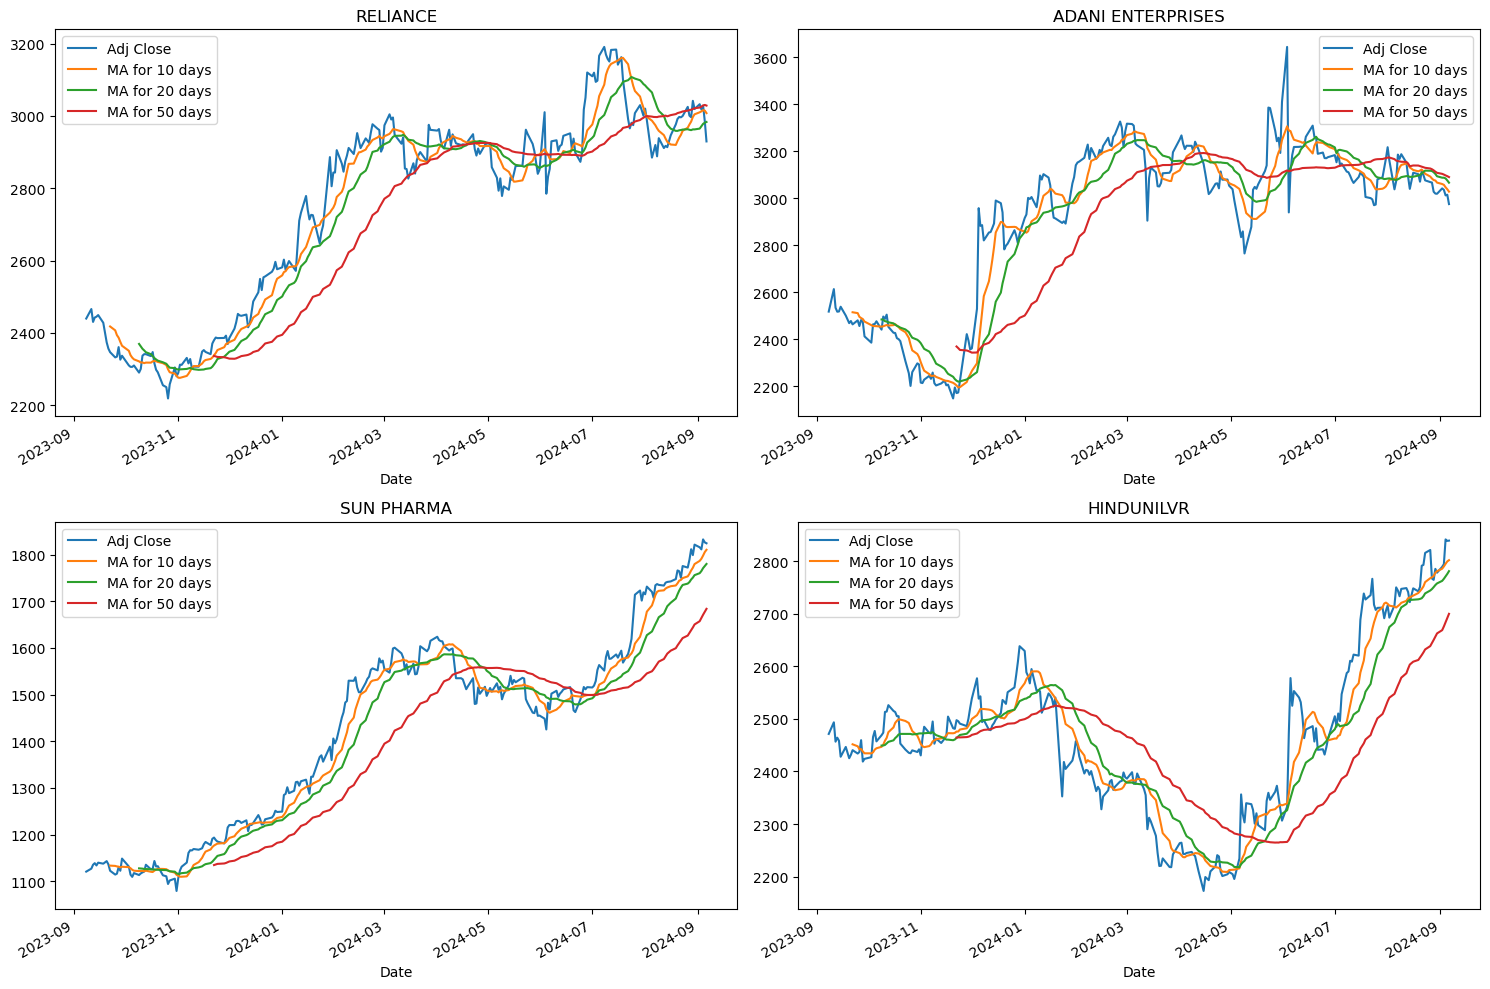

In [49]:
# Moving average periods
ma_day = [10, 20, 50]

# Calculate moving averages for each stock
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        # Create the moving average for each company's adjusted close price
        data[column_name, company] = data['Adj Close'][company].rolling(ma).mean()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot for RELIANCE
data['Adj Close']['RELIANCE.NS'].plot(ax=axes[0, 0], label='Adj Close')
data['MA for 10 days']['RELIANCE.NS'].plot(ax=axes[0, 0], label='MA for 10 days')
data['MA for 20 days']['RELIANCE.NS'].plot(ax=axes[0, 0], label='MA for 20 days')
data['MA for 50 days']['RELIANCE.NS'].plot(ax=axes[0, 0], label='MA for 50 days')
axes[0, 0].set_title('RELIANCE')
axes[0, 0].legend()

# Plot for ADANI ENTERPRISES
data['Adj Close']['ADANIENT.NS'].plot(ax=axes[0, 1], label='Adj Close')
data['MA for 10 days']['ADANIENT.NS'].plot(ax=axes[0, 1], label='MA for 10 days')
data['MA for 20 days']['ADANIENT.NS'].plot(ax=axes[0, 1], label='MA for 20 days')
data['MA for 50 days']['ADANIENT.NS'].plot(ax=axes[0, 1], label='MA for 50 days')
axes[0, 1].set_title('ADANI ENTERPRISES')
axes[0, 1].legend()

# Plot for SUN PHARMA
data['Adj Close']['SUNPHARMA.NS'].plot(ax=axes[1, 0], label='Adj Close')
data['MA for 10 days']['SUNPHARMA.NS'].plot(ax=axes[1, 0], label='MA for 10 days')
data['MA for 20 days']['SUNPHARMA.NS'].plot(ax=axes[1, 0], label='MA for 20 days')
data['MA for 50 days']['SUNPHARMA.NS'].plot(ax=axes[1, 0], label='MA for 50 days')
axes[1, 0].set_title('SUN PHARMA')
axes[1, 0].legend()

# Plot for HINDUSTAN UNILEVER
data['Adj Close']['HINDUNILVR.NS'].plot(ax=axes[1, 1], label='Adj Close')
data['MA for 10 days']['HINDUNILVR.NS'].plot(ax=axes[1, 1], label='MA for 10 days')
data['MA for 20 days']['HINDUNILVR.NS'].plot(ax=axes[1, 1], label='MA for 20 days')
data['MA for 50 days']['HINDUNILVR.NS'].plot(ax=axes[1, 1], label='MA for 50 days')
axes[1, 1].set_title('HINDUNILVR')
axes[1, 1].legend()

# Adjust layout and show the plot
fig.tight_layout()
plt.show()

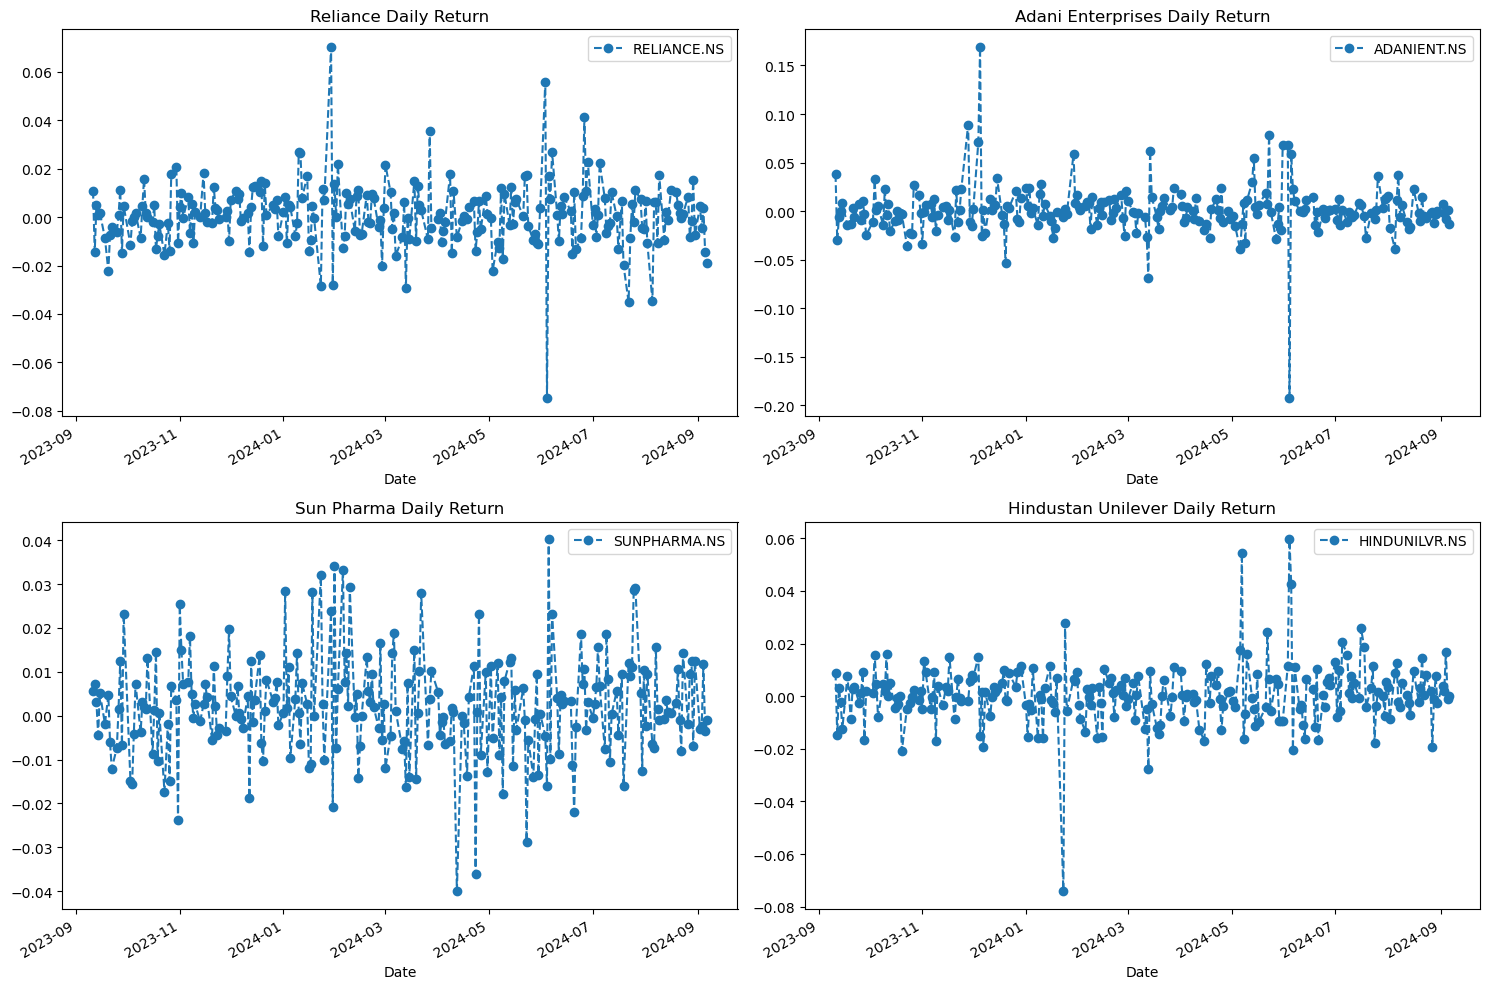

In [55]:
# Calculate Daily Returns for each stock
for company in company_list:
    data['Daily Return', company] = data['Adj Close'][company].pct_change()

# Create subplots for daily returns
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot for RELIANCE
data['Daily Return']['RELIANCE.NS'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0, 0].set_title('Reliance Daily Return')

# Plot for ADANI ENTERPRISES
data['Daily Return']['ADANIENT.NS'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')
axes[0, 1].set_title('Adani Enterprises Daily Return')

# Plot for SUN PHARMA
data['Daily Return']['SUNPHARMA.NS'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')
axes[1, 0].set_title('Sun Pharma Daily Return')

# Plot for HINDUSTAN UNILEVER
data['Daily Return']['HINDUNILVR.NS'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')
axes[1, 1].set_title('Hindustan Unilever Daily Return')

# Adjust layout and show the plot
fig.tight_layout()
plt.show()

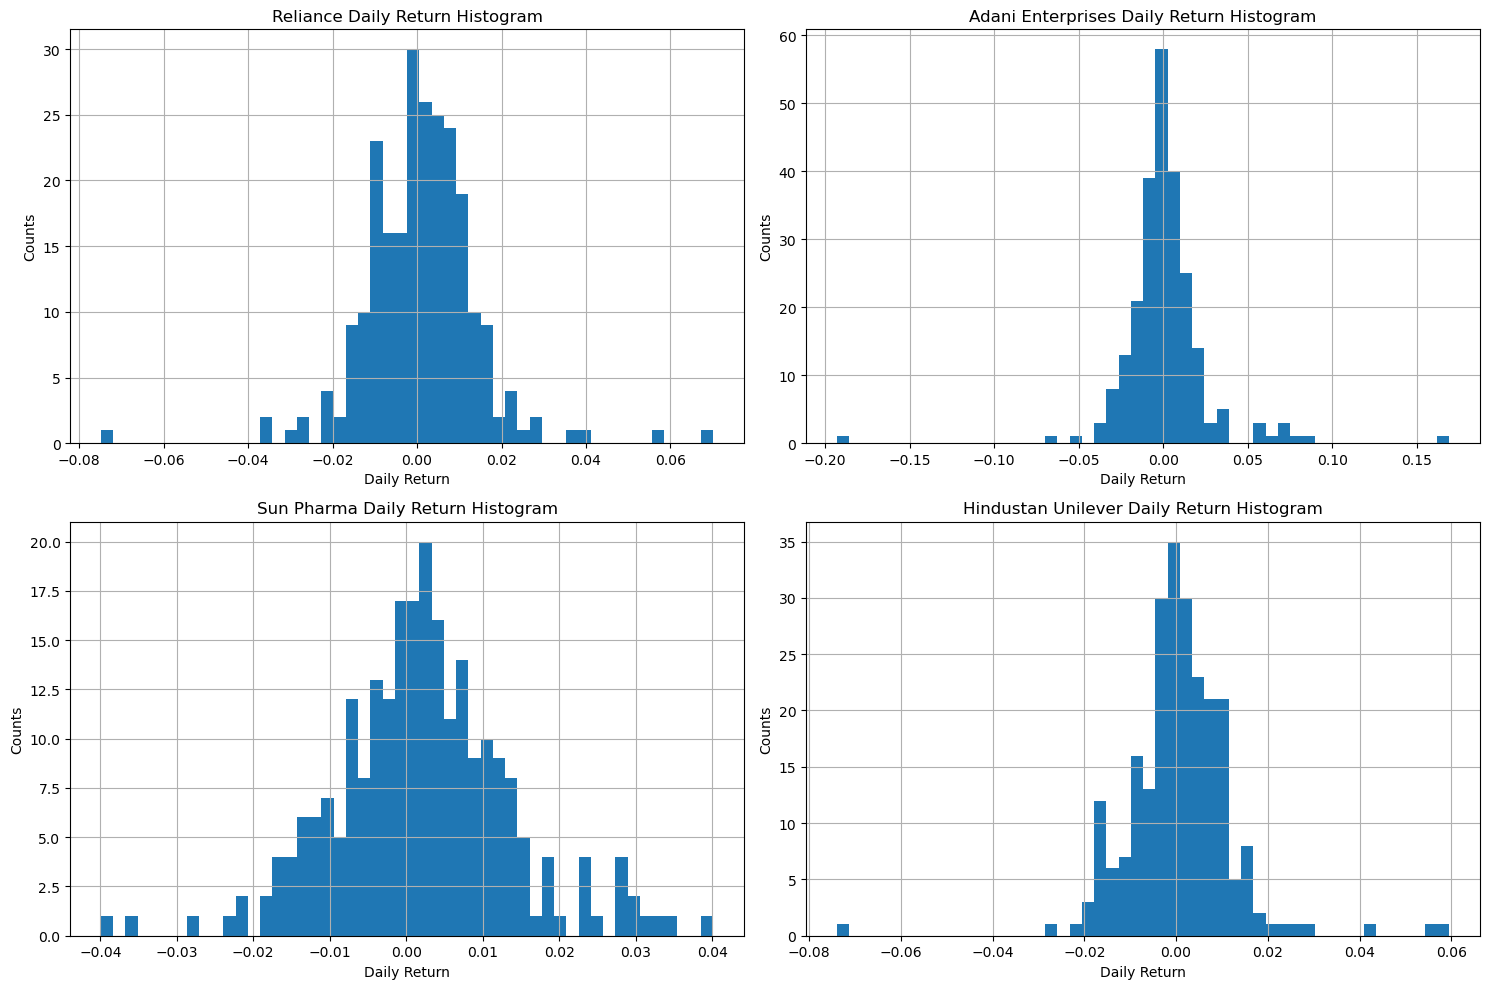

In [59]:
# Calculate Daily Returns for each stock
for company in company_list:
    data['Daily Return', company] = data['Adj Close'][company].pct_change()

# Create subplots for histograms of daily returns
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Loop through the companies and plot histograms
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    data['Daily Return'][company].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_names[i - 1]} Daily Return Histogram')

plt.tight_layout()
plt.show()

In [73]:
# Setting up start and end dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Grab all the closing prices for the stock list into one DataFrame using yfinance
closing_df = yf.download(stocks, start=start, end=end)['Adj Close']

# Display the closing prices DataFrame
print(closing_df.head())

# Make a new DataFrame for returns
indian_stocks = closing_df.pct_change()
indian_stocks.head()

[*********************100%***********************]  4 of 4 completed

Ticker                     ADANIENT.NS  HINDUNILVR.NS  RELIANCE.NS  \
Date                                                                 
2023-09-11 00:00:00+00:00  2613.895752    2493.490723  2466.229736   
2023-09-12 00:00:00+00:00  2534.677734    2456.721680  2430.600586   
2023-09-13 00:00:00+00:00  2517.884521    2464.291748  2442.759277   
2023-09-14 00:00:00+00:00  2518.784424    2458.638428  2445.001709   
2023-09-15 00:00:00+00:00  2539.026123    2428.062744  2449.536377   

Ticker                     SUNPHARMA.NS  
Date                                     
2023-09-11 00:00:00+00:00   1126.882446  
2023-09-12 00:00:00+00:00   1135.158813  
2023-09-13 00:00:00+00:00   1138.627930  
2023-09-14 00:00:00+00:00   1133.721680  
2023-09-15 00:00:00+00:00   1139.668823  


Ticker,ADANIENT.NS,HINDUNILVR.NS,RELIANCE.NS,SUNPHARMA.NS
Date,,,,
2023-09-11 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-09-12 00:00:00+00:00,-0.030306,-0.014746,-0.014447,0.007344
2023-09-13 00:00:00+00:00,-0.006625,0.003081,0.005002,0.003056
2023-09-14 00:00:00+00:00,0.000357,-0.002294,0.000918,-0.004309
2023-09-15 00:00:00+00:00,0.008036,-0.012436,0.001855,0.005246


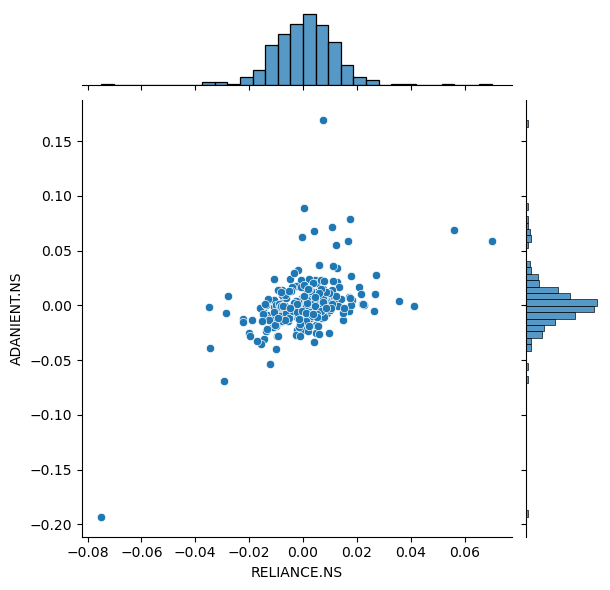

In [75]:
# We'll use joinplot to compare the daily returns of RELIANCE and ADANI
sns.jointplot(x='RELIANCE.NS', y='ADANIENT.NS', data=indian_stocks, kind='scatter')

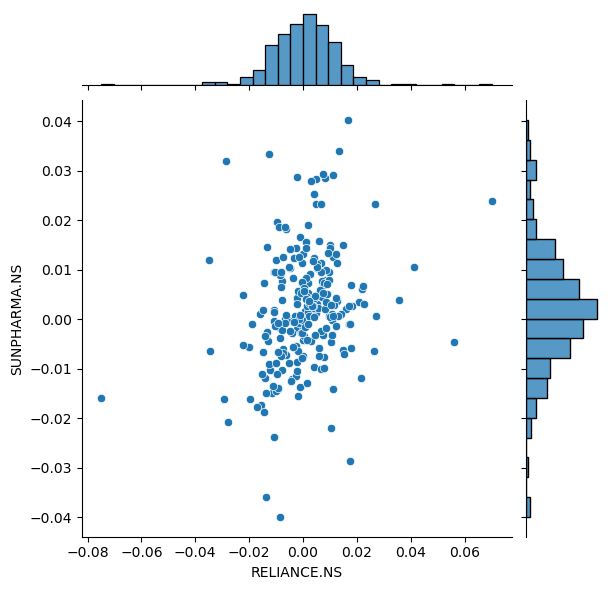

In [71]:
# We'll use joinplot to compare the daily returns of RELIANCE and ADANI
sns.jointplot(x='RELIANCE.NS', y='SUNPHARMA.NS', data=tech_rets, kind='scatter')

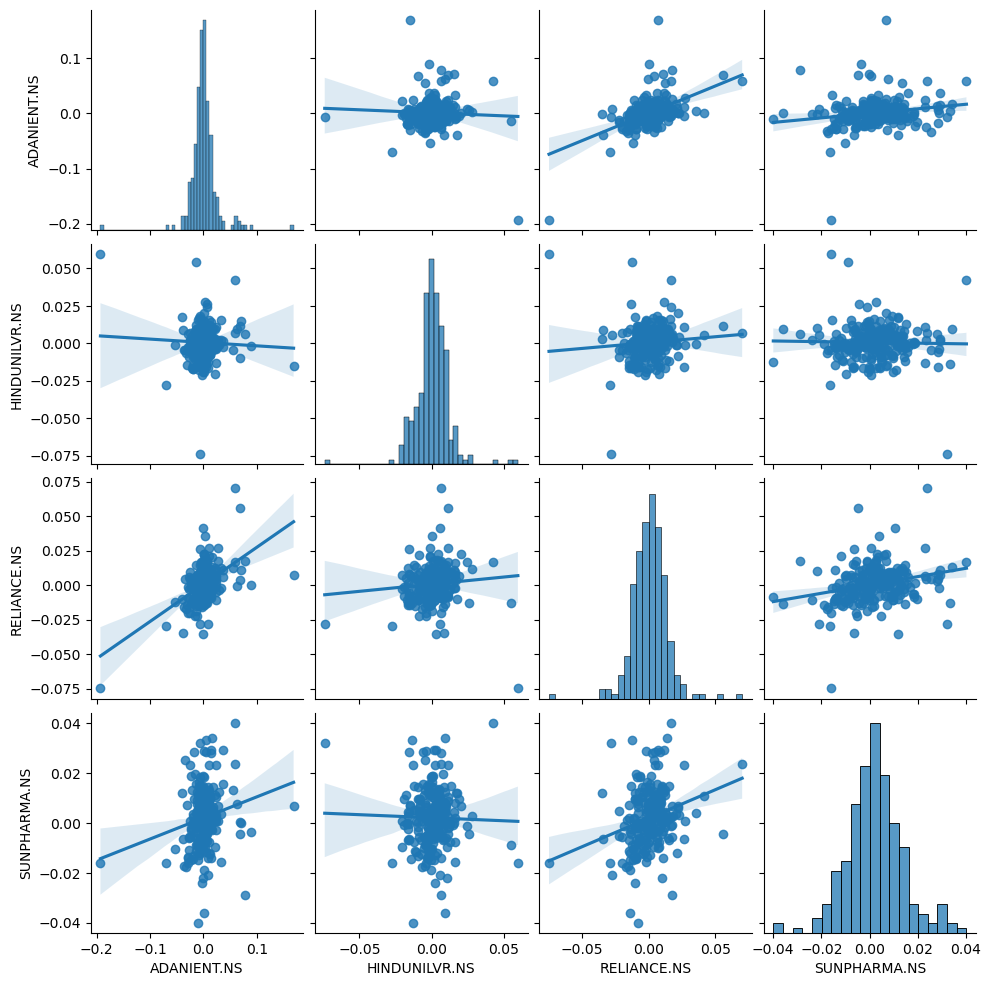

In [77]:
sns.pairplot(indian_stocks, kind='reg')

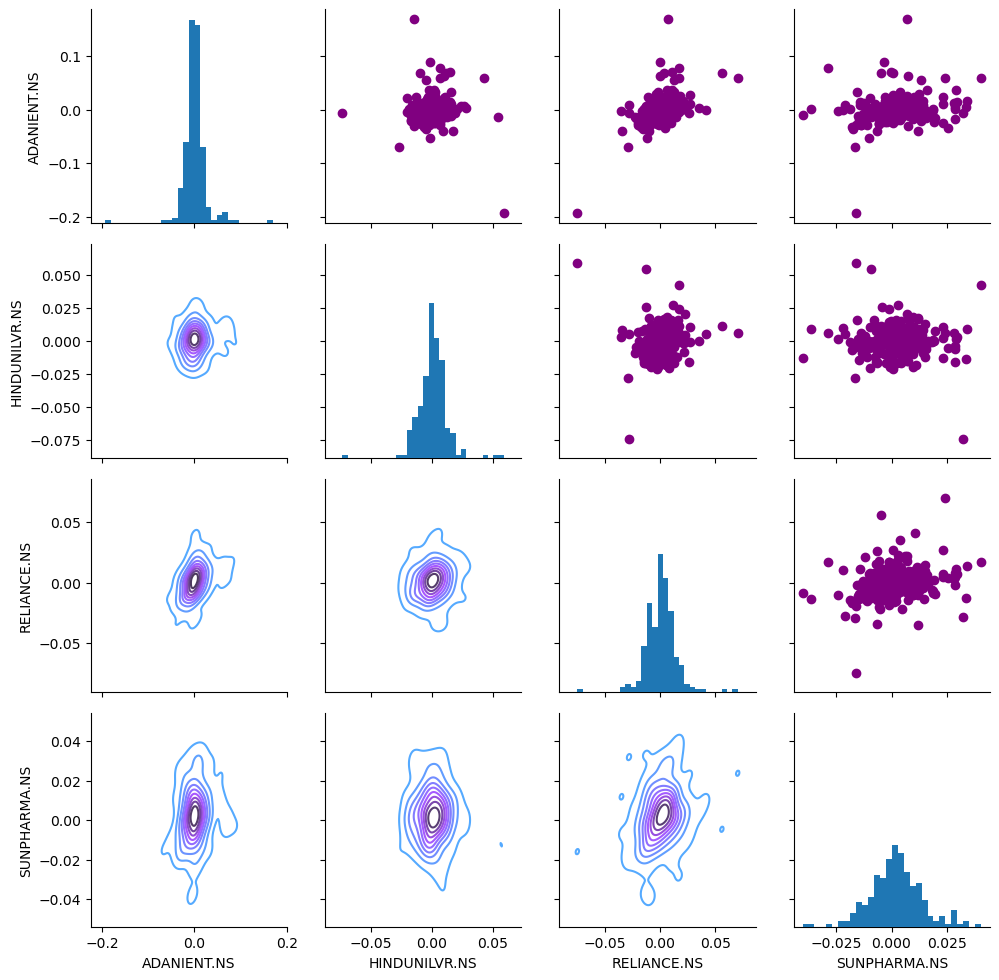

In [79]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(indian_stocks.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

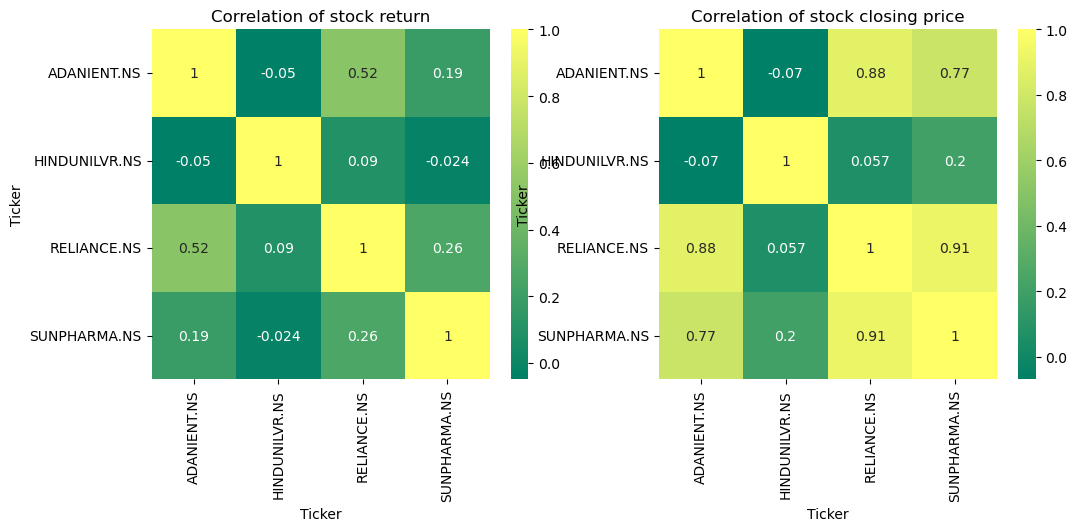

In [81]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(indian_stocks.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

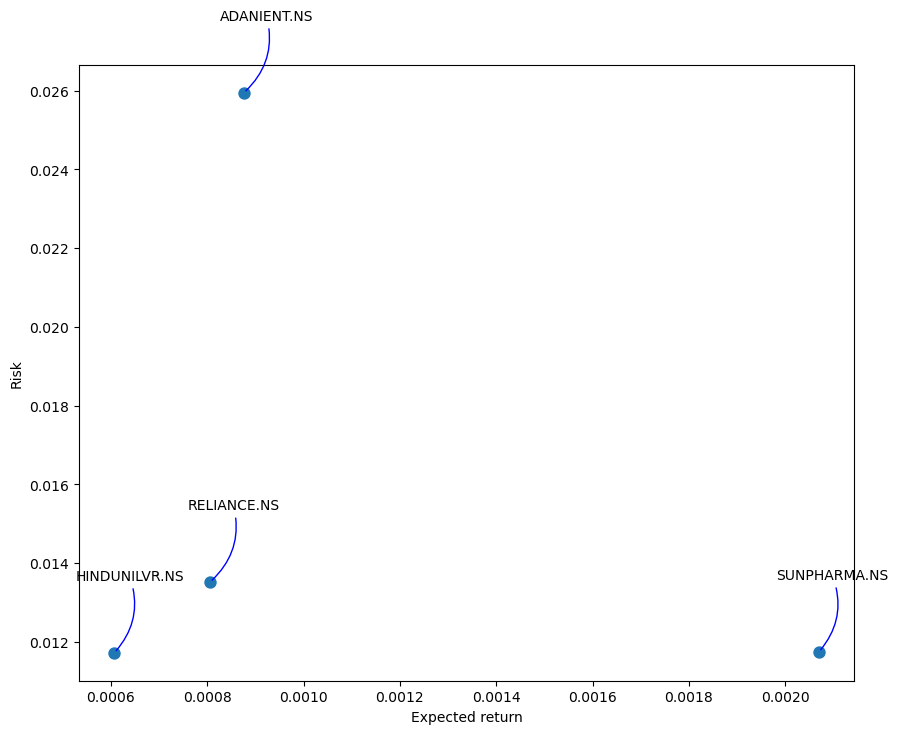

In [83]:
rets = indian_stocks.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))